# Parkinson Disease Analysis & Prediction

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [78]:
parkinson_data = pd.read_csv("parkinsons_data.txt")

In [79]:
parkinson_data.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [80]:
data = parkinson_data.copy()

In [81]:
data["sex"].value_counts()
pd.crosstab(data["sex"], columns="count", normalize=True)

col_0,count
sex,
0,0.682213
1,0.317787


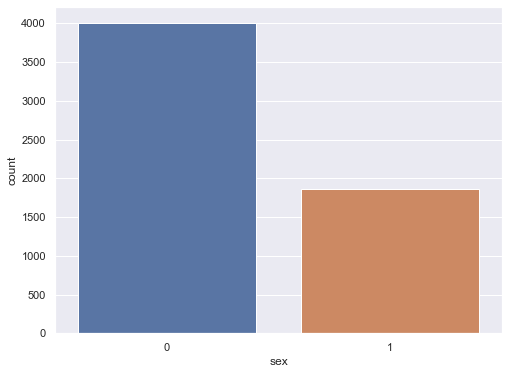

In [82]:
sns.set(rc = {"figure.figsize": (8, 6)})
sns.countplot(x="sex", data=data)

Text(0.5, 1.0, 'sex vs age')

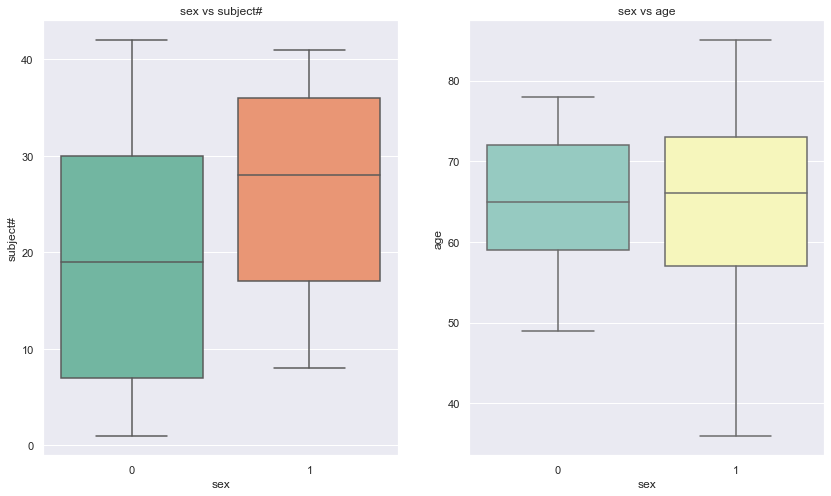

In [83]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(14,8))

sns.boxplot(x="sex", y="subject#", data=data, ax=axis1, palette="Set2")
axis1.set_title("sex vs subject#")

sns.boxplot(x="sex", y="age", data=data, ax=axis2, palette="Set3")
axis2.set_title("sex vs age")

Attribute Information:

Matrix column entries (attributes): 
name - ASCII subject name and recording number 
MDVP:Fo(Hz) - Average vocal fundamental frequency 
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency 
MDVP:Flo(Hz) - Minimum vocal fundamental frequency 
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency 
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude 
NHR,HNR - Two measures of ratio of noise to tonal components in the voice 
status - Health status of the subject (one) - Parkinson's, (zero) - healthy 
RPDE,D2 - Two nonlinear dynamical complexity measures 
DFA - Signal fractal scaling exponent 
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

In [84]:
parkinson_data.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [85]:
data.columns = ['status', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
status           5875 non-null int64
age              5875 non-null int64
sex              5875 non-null int64
test_time        5875 non-null float64
motor_UPDRS      5875 non-null float64
total_UPDRS      5875 non-null float64
Jitter(%)        5875 non-null float64
Jitter(Abs)      5875 non-null float64
Jitter:RAP       5875 non-null float64
Jitter:PPQ5      5875 non-null float64
Jitter:DDP       5875 non-null float64
Shimmer          5875 non-null float64
Shimmer(dB)      5875 non-null float64
Shimmer:APQ3     5875 non-null float64
Shimmer:APQ5     5875 non-null float64
Shimmer:APQ11    5875 non-null float64
Shimmer:DDA      5875 non-null float64
NHR              5875 non-null float64
HNR              5875 non-null float64
RPDE             5875 non-null float64
DFA              5875 non-null float64
PPE              5875 non-null float64
dtypes: float64(19), int64(3)
memory usag

In [86]:
data.describe()

,status,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [87]:
data["status"] %= 2

# Visualization

Text(0.5, 1.0, 'status vs DFA')

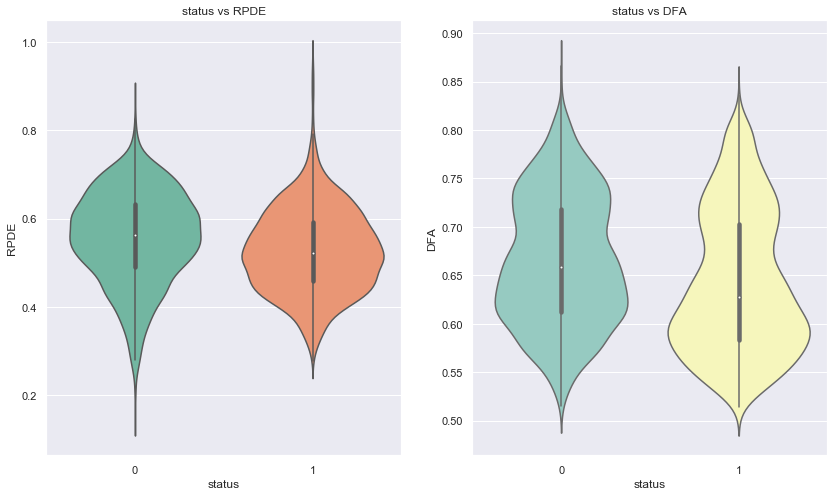

In [88]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(14,8))

sns.violinplot(x="status", y="RPDE", data=data, ax=axis1, palette="Set2")
axis1.set_title("status vs RPDE")

sns.violinplot(x="status", y="DFA", data=data, ax=axis2, palette="Set3")
axis2.set_title("status vs DFA")

Text(0.5, 1.0, 'status vs HNR')

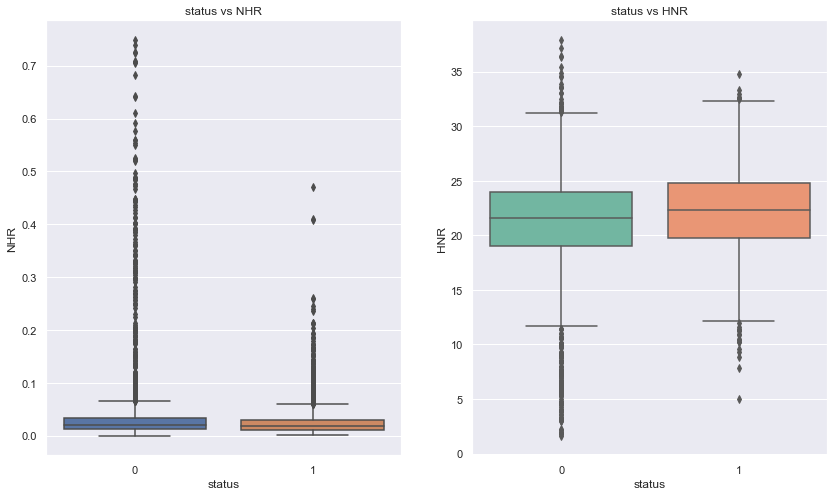

In [89]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(14,8))

sns.boxplot(x="status", y="NHR", data=data, ax=axis1)
axis1.set_title("status vs NHR")

sns.boxplot(x="status", y="HNR", data=data, ax=axis2, palette="Set2")
axis2.set_title("status vs HNR")

# Steps for building a preparing a Model in Machine Learning

## Step 1 Data preprocessing

Steps that we need to do with this data before doing the prediction part:
    1. Split data to Features and labels
    2. Scale features to the same scale
    3. Split data into training and testing portion

###  Step 1.1 Features vs Labels

In [90]:
labels = parkinson_data.iloc[:, 0].values
features = parkinson_data.iloc[:, 1:].values
print(labels)

[ 1  1  1 ... 42 42 42]


In [91]:
print(features.shape)
print(labels[0])

(5875, 21)
1


### Step 1.2 Scale data

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()
scled_features = scaler.fit_transform(features)

### Step 1.3 Splitting data into Training and test portions

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(scled_features, labels, test_size=0.3)

In [96]:
print("X_train shape = {}".format(X_train.shape))
print("y_train shape = {}".format(y_train.shape))
print("X_test shape =  {}".format(X_test.shape))
print("y_test shape =  {}".format(y_test.shape))

X_train shape = (4112, 21)
y_train shape = (4112,)
X_test shape =  (1763, 21)
y_test shape =  (1763,)


## Step 2 Applying Classification Algorithms

### Step 2.1 KNN Algorithm

In [97]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [100]:
print("KNN with k=5 got {}% accuracy on the test set.".format(accuracy_score(y_test, knn.predict(X_test))*100))

KNN with k=5 got 91.37833238797505% accuracy on the test set.


### Step 2.2 KNN Grid search

In [101]:
params_dict = {'n_neighbors':[3, 5, 9, 15], 'p':[1, 2, 3], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
gs = GridSearchCV(knn, param_grid=params_dict, verbose=10, cv=10)

In [102]:
gs.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.896, total=   0.1s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.886, total=   0.1s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.900, total=   0.1s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s


[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.927, total=   0.1s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.922, total=   0.1s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.910, total=   0.1s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.942, total=   0.1s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s


[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.932, total=   0.1s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.939, total=   0.1s
[CV] algorithm=auto, n_neighbors=3, p=1 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=1, score=0.934, total=   0.1s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=2, score=0.896, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.4s remaining:    0.0s


[CV] .. algorithm=auto, n_neighbors=3, p=2, score=0.883, total=   0.1s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=2, score=0.881, total=   0.1s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=2, score=0.903, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=2, score=0.934, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=2, score=0.898, total=   0.1s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=2, score=0.925, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=3, p=2, score=0.917, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, p=2 ..............................
[CV] .

[CV] .. algorithm=auto, n_neighbors=9, p=2, score=0.888, total=   0.1s
[CV] algorithm=auto, n_neighbors=9, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=9, p=2, score=0.867, total=   0.1s
[CV] algorithm=auto, n_neighbors=9, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=9, p=2, score=0.888, total=   0.1s
[CV] algorithm=auto, n_neighbors=9, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=9, p=2, score=0.881, total=   0.1s
[CV] algorithm=auto, n_neighbors=9, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=9, p=2, score=0.903, total=   0.1s
[CV] algorithm=auto, n_neighbors=9, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=9, p=2, score=0.878, total=   0.1s
[CV] algorithm=auto, n_neighbors=9, p=2 ..............................
[CV] .. algorithm=auto, n_neighbors=9, p=2, score=0.920, total=   0.1s
[CV] algorithm=auto, n_neighbors=9, p=2 ..............................
[CV] .

[CV]  algorithm=ball_tree, n_neighbors=3, p=1, score=0.934, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=3, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=3, p=2, score=0.896, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=3, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=3, p=2, score=0.883, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=3, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=3, p=2, score=0.881, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=3, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=3, p=2, score=0.903, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=3, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=3, p=2, score=0.934, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=3, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=3, p=2, score=0.898, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=3, p=2 ...........

[CV]  algorithm=ball_tree, n_neighbors=9, p=1, score=0.910, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=9, p=1 .........................
[CV]  algorithm=ball_tree, n_neighbors=9, p=1, score=0.927, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=9, p=1 .........................
[CV]  algorithm=ball_tree, n_neighbors=9, p=1, score=0.915, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=9, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=9, p=2, score=0.888, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=9, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=9, p=2, score=0.867, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=9, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=9, p=2, score=0.888, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=9, p=2 .........................
[CV]  algorithm=ball_tree, n_neighbors=9, p=2, score=0.881, total=   0.1s
[CV] algorithm=ball_tree, n_neighbors=9, p=2 ...........

[CV]  algorithm=kd_tree, n_neighbors=3, p=1, score=0.910, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=3, p=1 ...........................
[CV]  algorithm=kd_tree, n_neighbors=3, p=1, score=0.942, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=3, p=1 ...........................
[CV]  algorithm=kd_tree, n_neighbors=3, p=1, score=0.932, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=3, p=1 ...........................
[CV]  algorithm=kd_tree, n_neighbors=3, p=1, score=0.939, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=3, p=1 ...........................
[CV]  algorithm=kd_tree, n_neighbors=3, p=1, score=0.934, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=3, p=2 ...........................
[CV]  algorithm=kd_tree, n_neighbors=3, p=2, score=0.896, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=3, p=2 ...........................
[CV]  algorithm=kd_tree, n_neighbors=3, p=2, score=0.883, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=3, p=2 ...........................

[CV]  algorithm=kd_tree, n_neighbors=9, p=1, score=0.912, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=9, p=1 ...........................
[CV]  algorithm=kd_tree, n_neighbors=9, p=1, score=0.932, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=9, p=1 ...........................
[CV]  algorithm=kd_tree, n_neighbors=9, p=1, score=0.900, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=9, p=1 ...........................
[CV]  algorithm=kd_tree, n_neighbors=9, p=1, score=0.934, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=9, p=1 ...........................
[CV]  algorithm=kd_tree, n_neighbors=9, p=1, score=0.910, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=9, p=1 ...........................
[CV]  algorithm=kd_tree, n_neighbors=9, p=1, score=0.927, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=9, p=1 ...........................
[CV]  algorithm=kd_tree, n_neighbors=9, p=1, score=0.915, total=   0.1s
[CV] algorithm=kd_tree, n_neighbors=9, p=2 ...........................

[CV] . algorithm=brute, n_neighbors=3, p=1, score=0.886, total=   0.1s
[CV] algorithm=brute, n_neighbors=3, p=1 .............................
[CV] . algorithm=brute, n_neighbors=3, p=1, score=0.900, total=   0.1s
[CV] algorithm=brute, n_neighbors=3, p=1 .............................
[CV] . algorithm=brute, n_neighbors=3, p=1, score=0.927, total=   0.1s
[CV] algorithm=brute, n_neighbors=3, p=1 .............................
[CV] . algorithm=brute, n_neighbors=3, p=1, score=0.922, total=   0.1s
[CV] algorithm=brute, n_neighbors=3, p=1 .............................
[CV] . algorithm=brute, n_neighbors=3, p=1, score=0.910, total=   0.1s
[CV] algorithm=brute, n_neighbors=3, p=1 .............................
[CV] . algorithm=brute, n_neighbors=3, p=1, score=0.942, total=   0.1s
[CV] algorithm=brute, n_neighbors=3, p=1 .............................
[CV] . algorithm=brute, n_neighbors=3, p=1, score=0.932, total=   0.1s
[CV] algorithm=brute, n_neighbors=3, p=1 .............................
[CV] .

[CV] . algorithm=brute, n_neighbors=5, p=3, score=0.881, total=   1.2s
[CV] algorithm=brute, n_neighbors=9, p=1 .............................
[CV] . algorithm=brute, n_neighbors=9, p=1, score=0.896, total=   0.1s
[CV] algorithm=brute, n_neighbors=9, p=1 .............................
[CV] . algorithm=brute, n_neighbors=9, p=1, score=0.879, total=   0.1s
[CV] algorithm=brute, n_neighbors=9, p=1 .............................
[CV] . algorithm=brute, n_neighbors=9, p=1, score=0.895, total=   0.1s
[CV] algorithm=brute, n_neighbors=9, p=1 .............................
[CV] . algorithm=brute, n_neighbors=9, p=1, score=0.912, total=   0.1s
[CV] algorithm=brute, n_neighbors=9, p=1 .............................
[CV] . algorithm=brute, n_neighbors=9, p=1, score=0.932, total=   0.1s
[CV] algorithm=brute, n_neighbors=9, p=1 .............................
[CV] . algorithm=brute, n_neighbors=9, p=1, score=0.900, total=   0.1s
[CV] algorithm=brute, n_neighbors=9, p=1 .............................
[CV] .

[CV]  algorithm=brute, n_neighbors=15, p=3, score=0.886, total=   1.2s
[CV] algorithm=brute, n_neighbors=15, p=3 ............................
[CV]  algorithm=brute, n_neighbors=15, p=3, score=0.883, total=   1.2s
[CV] algorithm=brute, n_neighbors=15, p=3 ............................
[CV]  algorithm=brute, n_neighbors=15, p=3, score=0.854, total=   1.2s


[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  3.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 9, 15], 'p': [1, 2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [103]:
print(gs.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='uniform')


In [104]:
new_knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=1,
           weights='uniform')
new_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=3, p=1,
                     weights='uniform')

In [105]:
print("KNN - fine tuned, got {}% accuracy on the test set.".format(accuracy_score(y_test, new_knn.predict(X_test))*100))

KNN - fine tuned, got 92.79636982416336% accuracy on the test set.


### Step 2.3 Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
lr = LogisticRegression(max_iter = 120000)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=120000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
print("Logistic regression - default, got {}% accuracy on the test set.".format(accuracy_score(y_test, lr.predict(X_test))*100))

Logistic regression - default, got 97.16392512762337% accuracy on the test set.


In [109]:
lr_tuned = LogisticRegression(C=1000, penalty='l2', max_iter = 120000)
lr_tuned.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=120000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
print("Logistic regression - tuned, got {}% accuracy on the test set.".format(accuracy_score(y_test, lr_tuned.predict(X_test))*100))

Logistic regression - tuned, got 98.92229154849687% accuracy on the test set.


### Step 2.4 Tree and forest classifiers

#### Step 2.4.1 Decision Tree

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [113]:
print("Decision tree classifier, got {}% accuracy on the test set.".format(accuracy_score(y_test, dtc.predict(X_test))*100))

Decision tree classifier, got 98.86557005104935% accuracy on the test set.


#### Step 2.4.2  Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
rfc = RandomForestClassifier(n_estimators=350)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [116]:
print("Random forest classifier, got {}% accuracy on the test set.".format(accuracy_score(y_test, rfc.predict(X_test))*100))

Random forest classifier, got 99.37606352807714% accuracy on the test set.


## Summary:

In this task as you can see the best overall performance (accuracy) on the test set is seen with Random Forest Classifier - 94.4%. Right behind it Logistic Regression showed great accuracy 99.0%(approx).

In [119]:
accuracy_tree = cross_val_score(dtc, scled_features, labels, scoring='accuracy', cv=10)

In [120]:
print(np.mean(accuracy_tree))

0.990636987333264


To be sure we tested the algorithm with best performance on cross_validation on whole dataset and Performance is pretty good.